In [1]:
from relatio import load_data
srl_res = load_data('trump_tweet_archive', 'srl_res')

from relatio.utils import load_roles
postproc_roles = load_roles('postproc_roles.json')

from relatio.utils import load_entities
known_entities = load_entities('entities.pkl')
   
top_known_entities = [e[0] for e in list(known_entities.most_common(100)) if e[0] != '']

from relatio.narrative_models import NarrativeModel

m = NarrativeModel(
    model_type = 'kmeans',
    roles_considered = ['ARG0', 'B-V', 'B-ARGM-NEG', 'ARG1', 'ARG2'],
    roles_with_known_entities = ['ARG0','ARG1'],
    known_entities = top_known_entities,
    assignment_to_known_entities = 'character_matching',
    roles_with_unknown_entities = ['ARG0','ARG1','ARG2'],
    threshold = 0.3
)    
             
m.fit(postproc_roles, progress_bar = True)

/home/germain/Desktop/relatio/.tox/dev/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/germain/Desktop/relatio/.tox/dev/lib/python3.7/site-packages/torch/cuda/__init__.py:82: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0
2022-07-06 18:07:48.513235: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-07-06 18:07:48.513283: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: germain-XPS-15-9500
2022-07-06 1

Embedding phrases...
Computing phrase embeddings...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20781/20781 [00:38<00:00, 538.39it/s]


Clustering phrases into clusters...
Labeling the clusters by the most frequent phrases...


/home/germain/Desktop/relatio/relatio/narrative_models.py:401: RuntimeWarning: Multiple labels for cluster 54- 2 shown: [('colorado', 13), ('indiana', 13)]. First one is picked.
  RuntimeWarning,
/home/germain/Desktop/relatio/relatio/narrative_models.py:401: RuntimeWarning: Multiple labels for cluster 65- 2 shown: [('letterman', 9), ('tom brady', 9)]. First one is picked.
  RuntimeWarning,
/home/germain/Desktop/relatio/relatio/narrative_models.py:401: RuntimeWarning: Multiple labels for cluster 105- 2 shown: [('caravan', 19), ('plane', 19)]. First one is picked.
  RuntimeWarning,
/home/germain/Desktop/relatio/relatio/narrative_models.py:401: RuntimeWarning: Multiple labels for cluster 144- 2 shown: [('aberdeen', 4), ('bird windfarm aberdeen', 4)]. First one is picked.
  RuntimeWarning,
/home/germain/Desktop/relatio/relatio/narrative_models.py:401: RuntimeWarning: Multiple labels for cluster 160- 2 shown: [('airport amp paris shutdown', 2), ('drug price reductions amp infrastructure', 2

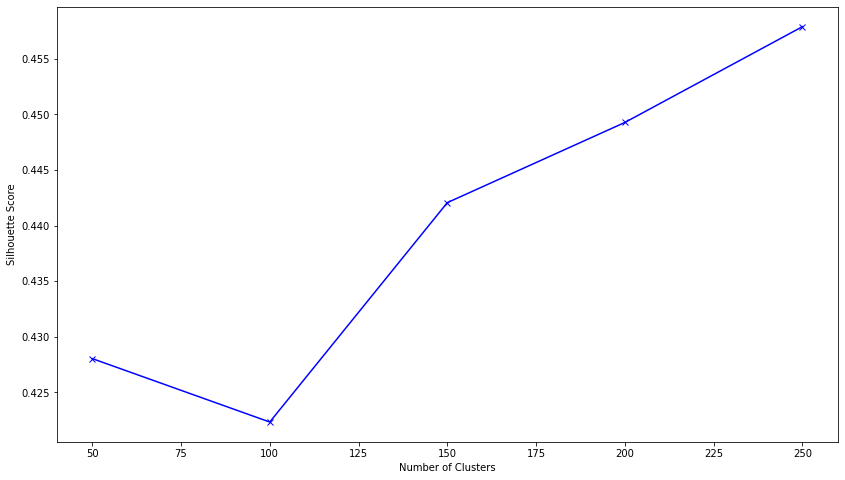

In [2]:
m.plot_selection_metric()

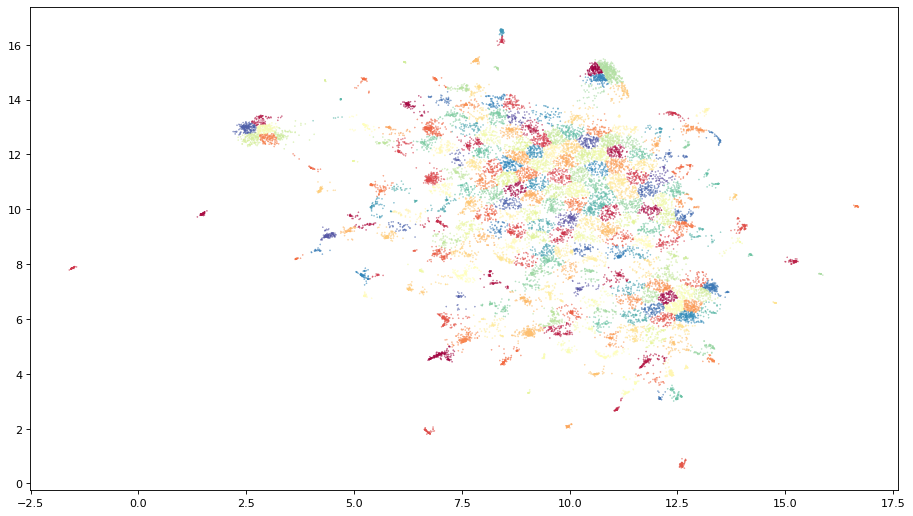

In [3]:
m.plot_clusters('hdbscan.pdf')

In [4]:
m.labels_unknown_entities

{0: 'trumpdoral',
 1: 'tom',
 2: 'disaster',
 3: 'voter',
 4: 'record',
 5: 'germany',
 6: 'golf',
 7: 'race',
 8: 'email',
 9: 'wall amp crime',
 10: 'amp family',
 11: 'congressman',
 12: 'deal',
 13: 'friend',
 14: 'campaign',
 15: 'bush',
 16: 'national guard',
 17: 'schiff',
 18: 'warming',
 19: 'year',
 20: 'tax',
 21: 'energy',
 22: 'speech',
 23: 'taxis',
 24: 'protester',
 25: 'club',
 26: 'good',
 27: 'patriot',
 28: 'trade',
 29: 'dollar',
 30: 'paper',
 31: 'people',
 32: 'story',
 33: 'direction',
 34: 'impeachment',
 35: 'terrorist',
 36: 'john',
 37: 'poll number',
 38: 'interview',
 39: 'decision',
 40: 'olympics',
 41: 'ally',
 42: 'judge',
 43: 'prime minister',
 44: 'national security',
 45: 'job',
 46: 'vaccine',
 47: 'ben carson',
 48: 'fund',
 49: 'complete endorsement',
 50: 'hurricane',
 51: 'daca',
 52: 'medicare',
 53: 'drug',
 54: 'colorado',
 55: 'unemployment',
 56: 'nation',
 57: 'law amp order',
 58: 'wrong',
 59: 'pre',
 60: 'election',
 61: 'governor',


In [10]:
m.inspect_cluster(label = 'radical left')

[('radical left', 45),
 ('radical', 8),
 ('radical islam', 4),
 ('radical left congresswomen', 4),
 ('funding radical ideology', 2),
 ('radical left crazy', 2),
 ('radical left crime cancel culture', 2),
 ('radical left lamestream medium', 2),
 ('radical left magazine', 2),
 ('statement radical left congresswomen', 2)]

In [6]:
m.clusters_to_txt()

In [11]:
narratives = m.predict(postproc_roles, progress_bar = True)


Predicting entities for role: ARG0...
Matching known entities (with character matching)...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24346/24346 [00:01<00:00, 15650.29it/s]


Matching unknown entities (with clustering model)...
Computing phrase embeddings...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24346/24346 [00:44<00:00, 545.73it/s]


Dimension reduction of vectors (PCA + UMAP)...
Assignment to clusters...
Assigning labels to matches...

Predicting entities for role: ARG1...
Matching known entities (with character matching)...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60900/60900 [00:03<00:00, 16990.08it/s]


Matching unknown entities (with clustering model)...
Computing phrase embeddings...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60900/60900 [01:53<00:00, 538.31it/s]


Dimension reduction of vectors (PCA + UMAP)...
Assignment to clusters...
Assigning labels to matches...

Predicting entities for role: ARG2...
Matching unknown entities (with clustering model)...
Computing phrase embeddings...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26756/26756 [00:49<00:00, 545.79it/s]


Dimension reduction of vectors (PCA + UMAP)...
Assignment to clusters...
Assigning labels to matches...


In [16]:
from relatio.utils import prettify
from collections import Counter

pretty_narratives = []
for n in narratives: 
    if n.get('ARG0') is not None:
        if n.get('B-V') is not None:
            if n.get('ARG1') is not None:
                pretty_narratives.append(prettify(n))
                
pretty_narratives = Counter(pretty_narratives)
for t in pretty_narratives.most_common(10): print(t)

('stock market hit record', 10)
('china want deal', 8)
('democrats want open borders', 7)
('china steal job', 7)
('stock market hit time', 7)
('democrats steal election', 6)
('steve love military', 6)
('interview discuss mittromney', 6)
('year breed year', 6)
('time kill country', 6)


In [17]:
from relatio import build_graph, draw_graph

G = build_graph(
    narratives, 
    top_n = 100, 
    prune_network = True
)

draw_graph(
    G,
    notebook = False,
    show_buttons = False,
    width="1600px",
    height="1000px",
    output_filename = 'example.html'
    )